## **Dataset 2** 

In the following dataset we have a list of attributes related to religious denominations and their membership and church counts in 1952, organized by county and state. Each attribute represents the number of members and churches for a specific denomination.

#### Import libraries

In [2]:
import plotly.express as px
import pandas as pd
from IPython.display import display, Image

#### Insert dataset

In [3]:
csv_file = 'datasets/1952.csv'
religion = pd.read_csv(csv_file)

### **Task 5** : Where would you create a cross-religion center of discussion between religions to maximize its impact? Support the proposal based on data analysis results.

In [4]:
selected_columns = ['CNAME'] + [col for col in religion.columns if col.endswith('_M')]
members = religion[selected_columns]
members.head()

,CNAME,SDA_M,AOG_M,ABC_M,SBC_M,COB_M,COGT_M,COGI_M,CGC_M,NAZRN_M,...,RECH_M,SOCBR_M,NSAC_M,UNCHU_M,UBC_M,UCHRC_M,UCA_M,VEDS_M,VLNTR_M,CGP_M
0,"Hale, AL",0,0,0,1522,0,0,86,0,55,...,0,0,0,0,0,0,0,0,0,0
1,"Henry, AL",0,23,0,4051,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Houston, AL",87,379,0,11921,0,14,0,0,29,...,0,0,0,0,0,0,0,0,0,0
3,"Jackson, AL",110,0,0,7875,0,252,0,0,37,...,0,0,0,0,0,0,0,0,0,0
4,"Jefferson, AL",991,648,0,94219,0,2070,935,0,634,...,0,0,0,47,0,0,0,0,0,454


In [5]:
difMembers = members.copy()  #create a copy of the dataframe Members  
difMembers['DIFMEMBERS'] = (difMembers != 0).sum(axis=1)  #creates a column which as a value is the count of different Members in this county
sorted_difMembers = difMembers.sort_values(by='DIFMEMBERS', ascending=False)  #sort the counties by the numbers of different Members that has 
print("Sorted data of the best three counties with the most unique religion's believers.")
sorted_difMembers[['CNAME', 'DIFMEMBERS']].head(3) 

Sorted data of the best three counties with the most unique religion's believers.


,CNAME,DIFMEMBERS
172,"Los Angeles, CA",67
574,"Cook, IL",63
1276,"Wayne, MI",57


In [6]:
bar3 = sorted_difMembers[['CNAME', 'DIFMEMBERS']].head(3)
fig = px.bar(bar3, x='CNAME', y='DIFMEMBERS', labels={'DIFMEMBERS': 'Number of different Believers'})
fig.update_layout(title='Number of Unique Believers in Each County', xaxis_title='Counties', yaxis_title='Number of different Believers')
fig.update_xaxes(tickangle=45)  
fig.update_traces(marker_color='firebrick') 
fig.show()

Upon analyzing the provided Data-Frame and the related bar plot, it can be observed that Los Angeles (CA) is the county with the greatest diversity of believers from different religions, consisting of 67 different groups. Following closely behind, Cook (IL) claims the second place with 63 distinct parts of believers, and Wayne (ML) claims the third place with 57 varied groups representing various faiths.

Taking account the number of unique believers and unique churches let's check once again what we have. 

In [8]:
selected_columns = ['CNAME'] + [col for col in religion.columns if col.endswith('_C')]
churches = religion[selected_columns]
difChurches = churches.copy()  #create a copy of the dataframe churches  
difChurches['DIFCHURCHES'] = (difChurches != 0).sum(axis=1)  #creates a column which as a value is the count of different churches in this county
sorted_difChurches = difChurches.sort_values(by='DIFCHURCHES', ascending=False)  #sort the counties by the numbers of different churches that has 
topchurches = sorted_difChurches[['CNAME', 'DIFCHURCHES']].head(3)
topmembers = sorted_difMembers[['CNAME', 'DIFMEMBERS']].head(3)
result_df = pd.concat([topmembers, topchurches], axis=1)
result_df

,CNAME,DIFMEMBERS,CNAME,DIFCHURCHES
172,"Los Angeles, CA",67,"Los Angeles, CA",70
574,"Cook, IL",63,"Cook, IL",66
1276,"Wayne, MI",57,"Wayne, MI",61


It is reasonable to observe diversity in religions and churches concentrated in the same geographic areas, and this outcome aligns with our expectations.


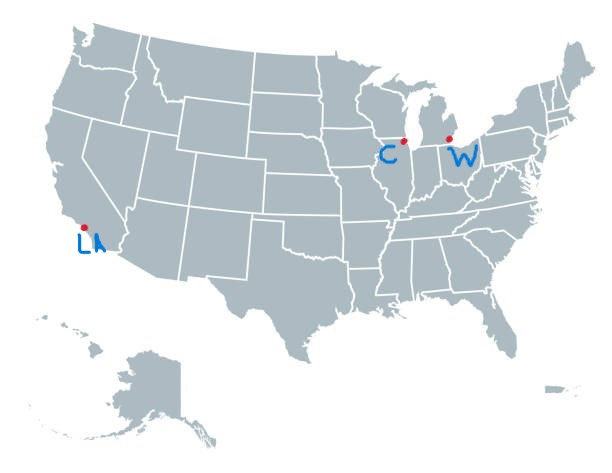

In [9]:
display(Image(filename='datasets/America.jpg', width=400, height=300))

Considering the various datasets, bar plots, and maps, the selection of an optimal location for establishing a cross-religion center of discussion depends on multiple factors. While Los Angeles appears favorable based solely on the distribution of religion's members and churches, a more comprehensive analysis that considers both the geographic positions of counties and the distribution of religion's members and churches suggests a county Cook or Wayne, and specifically Wayne. This preference is influenced by the combined population of Cook and Wayne being higher than that of Los Angeles. Additionally, the surrounding counties near especially Wayne boast larger populations such New York, compared to the area around Los Angeles.

#### Insert dataset